Classification

classification model to predict whether a customer will purchase a bike (Purchased Bike column)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


file_path = '/content/drive/MyDrive/NNDL/Bike Sales Dashboard.xlsx'
bike_buyers_data = pd.read_excel(file_path, sheet_name='bike_buyers')

In [ ]:
# Preprocessing
# Drop the ID column
bike_buyers_data = bike_buyers_data.drop('ID', axis=1)

# Encoding categorical variables
label_encoders = {}
for column in bike_buyers_data.select_dtypes(include=['object']).columns:
    if column != 'Purchased Bike':
        le = LabelEncoder()
        bike_buyers_data[column] = le.fit_transform(bike_buyers_data[column])
        label_encoders[column] = le

In [ ]:
# Encoding target variable
target_le = LabelEncoder()
bike_buyers_data['Purchased Bike'] = target_le.fit_transform(bike_buyers_data['Purchased Bike'])

In [ ]:
# Split data into features and target variable
X = bike_buyers_data.drop('Purchased Bike', axis=1)
y = bike_buyers_data['Purchased Bike']

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

accuracy

0.71

In [ ]:
print(classification_report_str)

              precision    recall  f1-score   support

           0       0.69      0.74      0.72       148
           1       0.73      0.68      0.70       152

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300



Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

file_path = '/content/drive/MyDrive/NNDL/dress_rental_prices.csv'
dress_data = pd.read_csv(file_path)

In [ ]:
# Dropping
dress_data = dress_data.drop(['Unnamed: 0', 'ID', 'Name'], axis=1)

# Encode categorical variables
label_encoders = {}
for column in dress_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    dress_data[column] = le.fit_transform(dress_data[column])
    label_encoders[column] = le

In [ ]:
# Split data into features and target variable
X = dress_data.drop('Price', axis=1)
y = dress_data['Price']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Train a Random Forest Regressor
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
mse

1000.9650391910025

In [ ]:
r2

0.3614311824775247

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


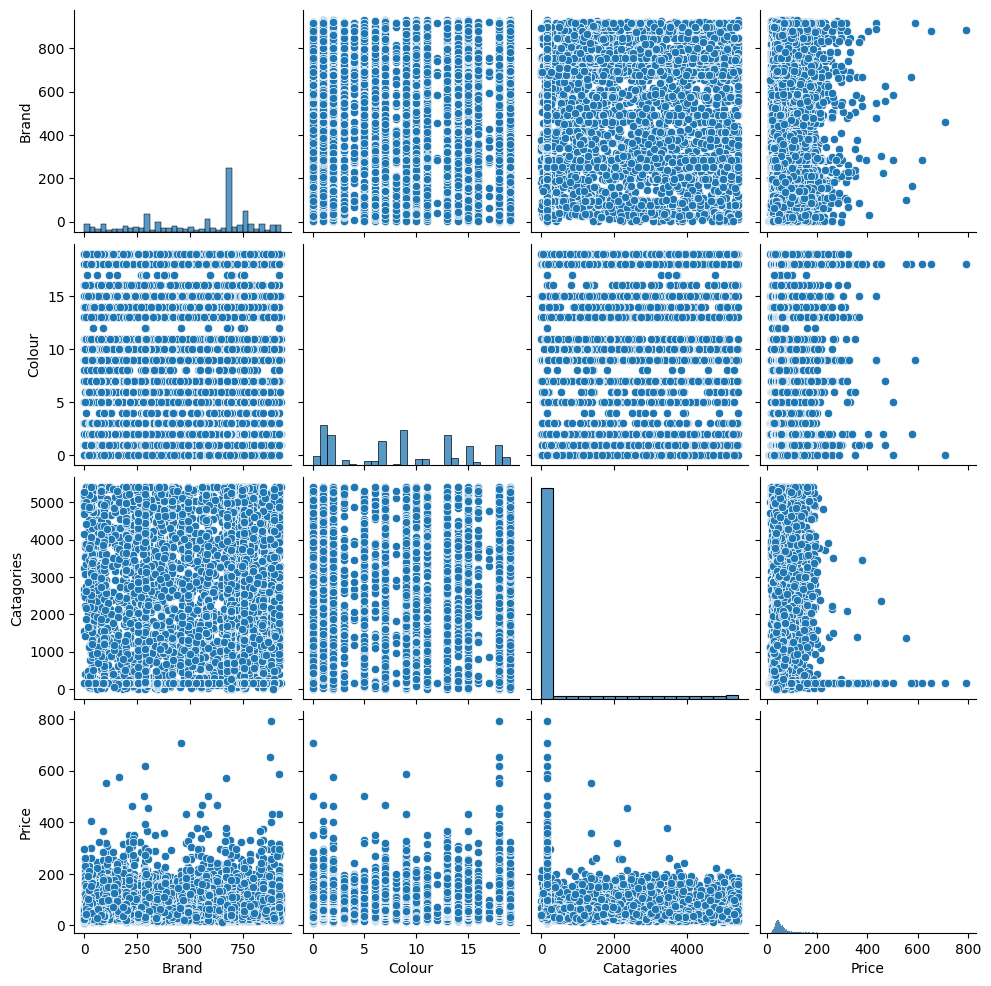

In [ ]:
sns.pairplot(dress_data)
plt.show()

In [ ]:
# Trying different regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

In [ ]:
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    print(f"{name} MSE: {-scores.mean()}")


Linear Regression MSE: 1464.226418188273
Decision Tree MSE: 1333.643942557339
Random Forest MSE: 1044.885211906273


In [ ]:
# Train and evaluate the best model
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Best Model MSE: {mse}")
print(f"Best Model R^2: {r2}")

Best Model MSE: 1000.9650391910025
Best Model R^2: 0.3614311824775247
